In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz
%matplotlib inline

In [2]:
# read the data

data = pd.read_csv("tripdata.csv")

In [3]:
# show how the data looks like

data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


In [4]:
# show the data types of each field

data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
# delete columns we won't be using

data.drop(["start_station_name" , "start_station_id", "end_station_name", "end_station_id"], axis=1,inplace=True)

In [6]:
# show how the data looks so far

data.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,41.88,-87.74,41.88,-87.71,casual


In [7]:
# convert fileds with time data type to datetime

data["started_at"] = pd.to_datetime(data["started_at"])
data["ended_at"] = pd.to_datetime(data["ended_at"])

In [8]:
# calculate the ride length for each observation

data["ride_length"] = (data["ended_at"]) - (data["started_at"])
data.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,41.89,-87.68,41.89,-87.67,casual,0 days 00:02:44
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,41.94,-87.64,41.98,-87.67,casual,0 days 00:15:14
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,41.81,-87.72,41.80,-87.72,casual,0 days 00:03:41
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,41.80,-87.72,41.81,-87.72,casual,0 days 00:08:49
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,41.88,-87.74,41.88,-87.71,casual,0 days 00:10:32


In [9]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,756147.000000,756147.000000,755552.000000,755552.000000,756147
mean,41.901944,-87.647822,41.902184,-87.647988,0 days 00:20:30.636389485
std,0.046666,0.029950,0.046760,0.030100,0 days 01:46:11.080688486
min,41.648500,-87.840000,41.570000,-87.870000,-1 days +23:52:57
25%,41.881892,-87.662412,41.882087,-87.663576,0 days 00:06:54
50%,41.900363,-87.644140,41.900960,-87.644140,0 days 00:12:08
75%,41.929666,-87.629318,41.930000,-87.629318,0 days 00:21:36
max,42.070000,-87.520000,42.168116,-87.500000,22 days 19:38:32


In [10]:
data = data.dropna(subset =["end_lat", "end_lng"])

In [11]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,41.89,-87.68,41.89,-87.67,casual,0 days 00:02:44
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,41.94,-87.64,41.98,-87.67,casual,0 days 00:15:14
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,41.81,-87.72,41.80,-87.72,casual,0 days 00:03:41
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,41.80,-87.72,41.81,-87.72,casual,0 days 00:08:49
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,41.88,-87.74,41.88,-87.71,casual,0 days 00:10:32


In [12]:
report = sweetviz.analyze(data)

                                             |                                             | [  0%]   00:00 ->…


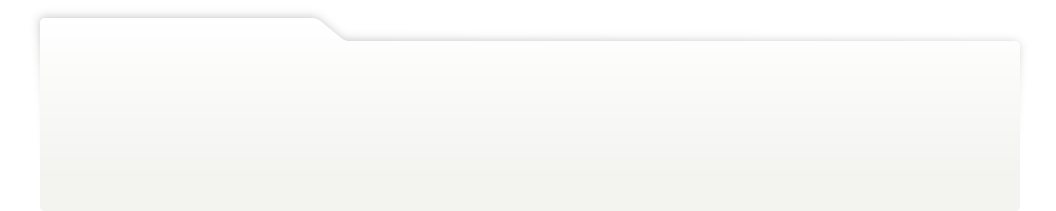
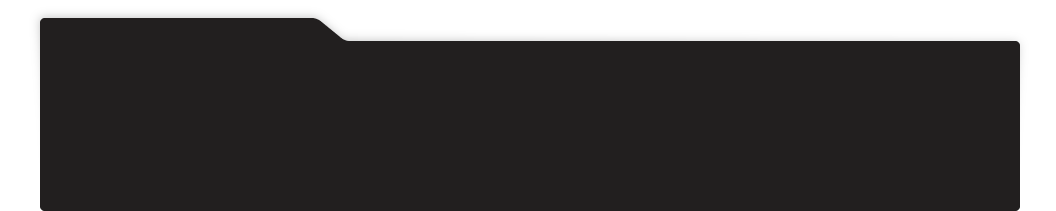
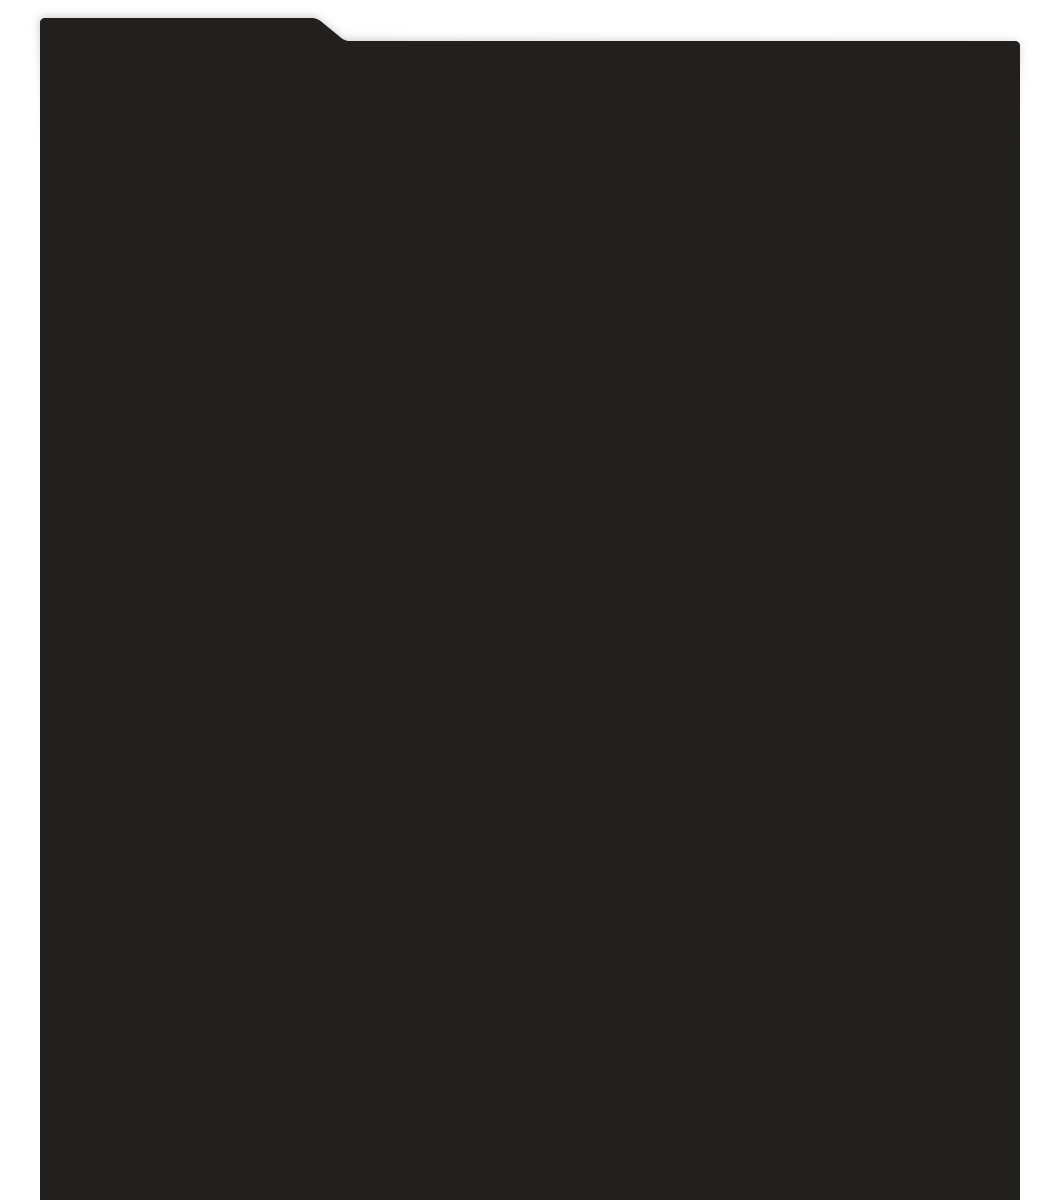
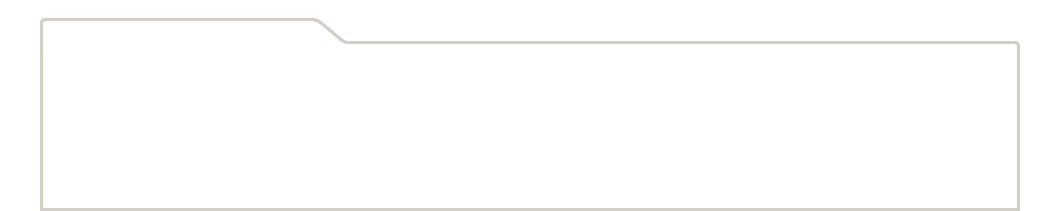
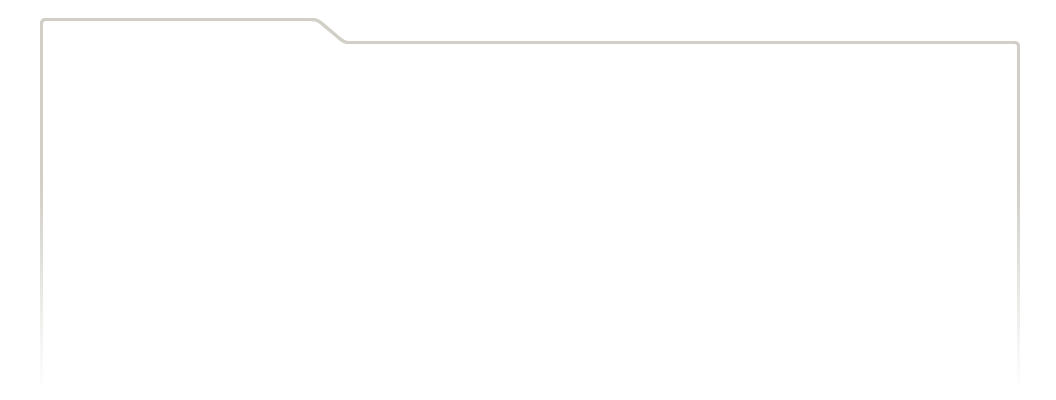
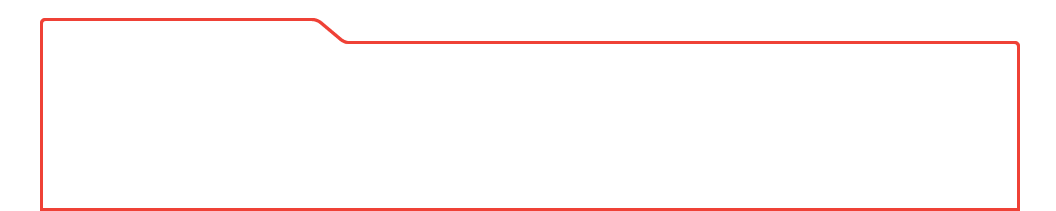
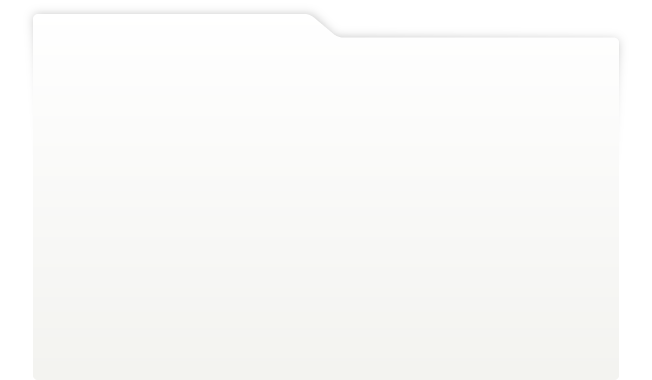
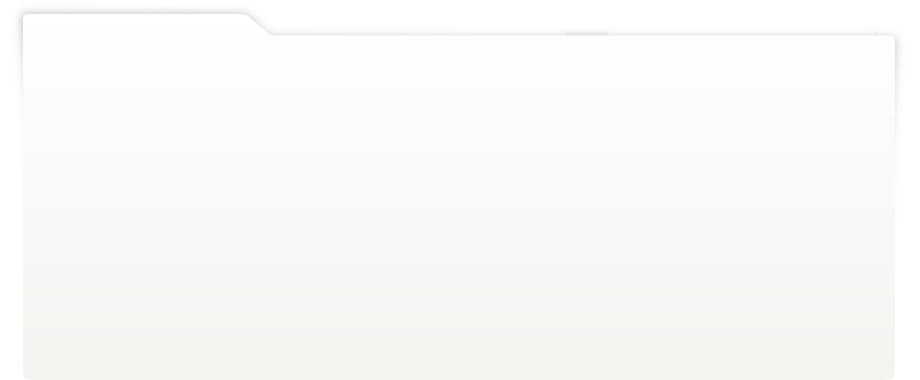
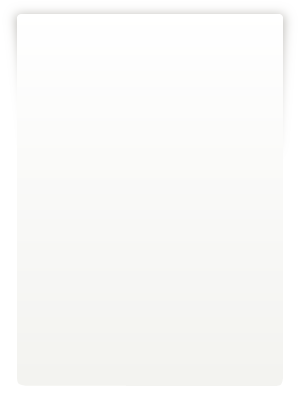
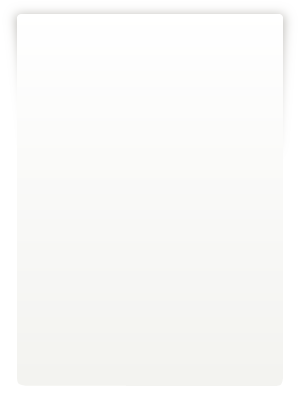
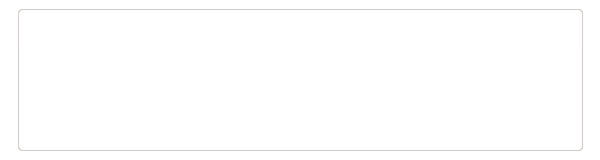
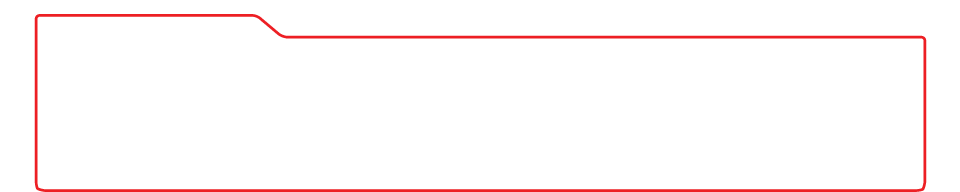
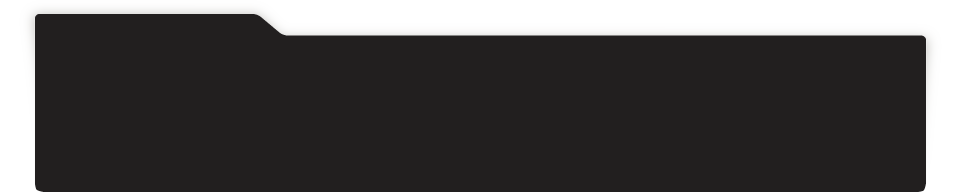
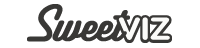
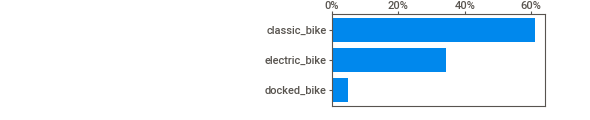
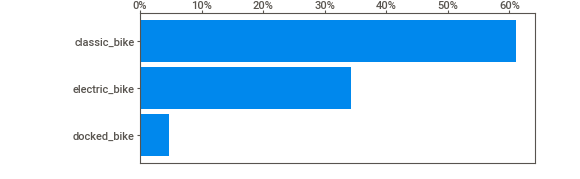
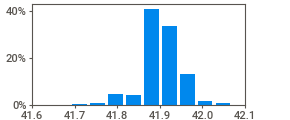
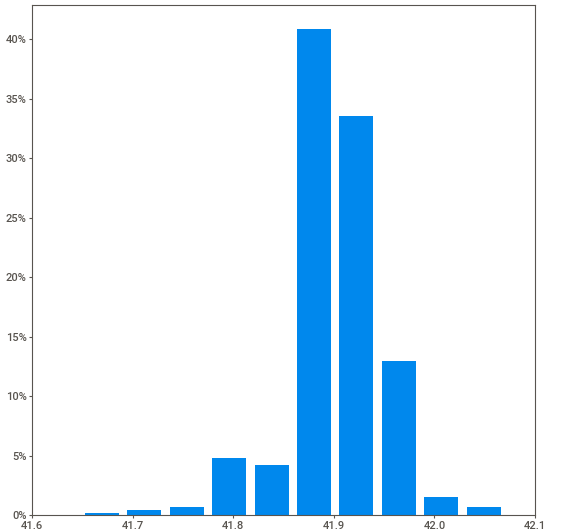
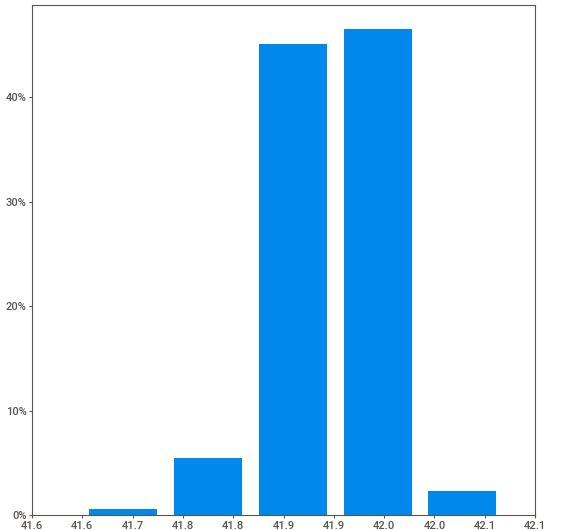
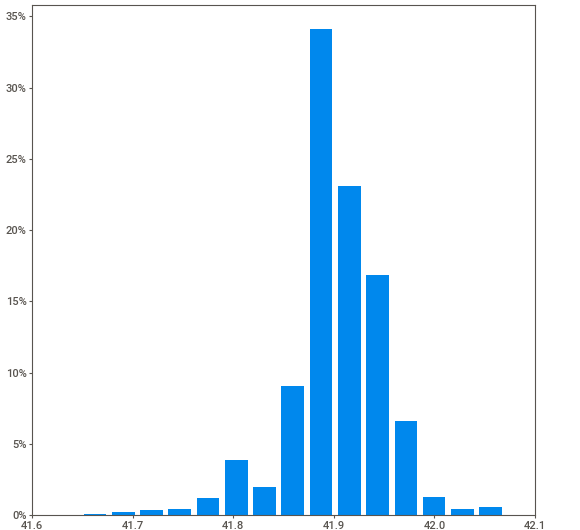
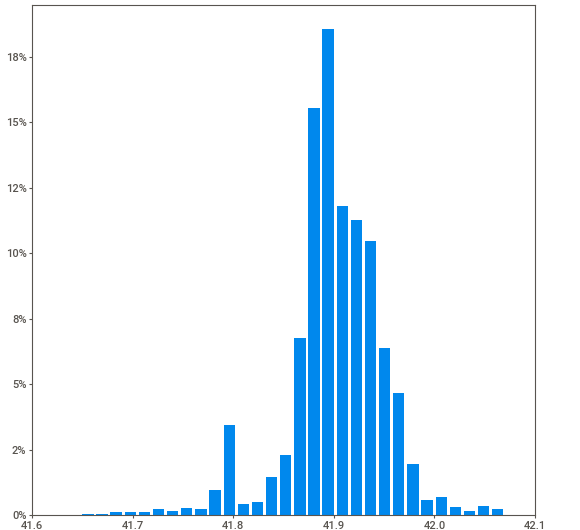
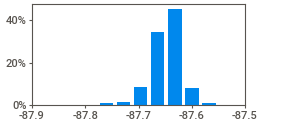
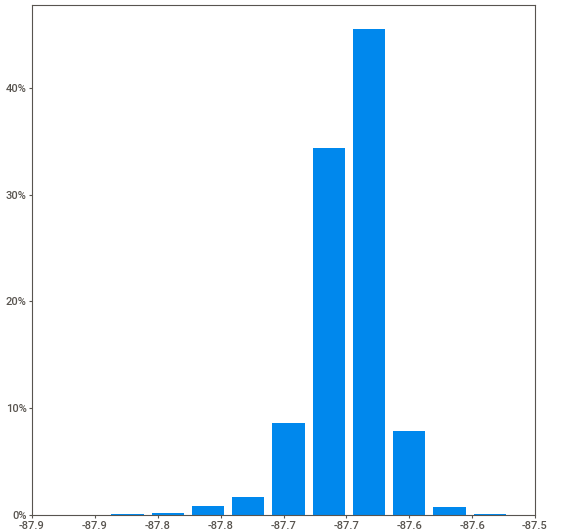
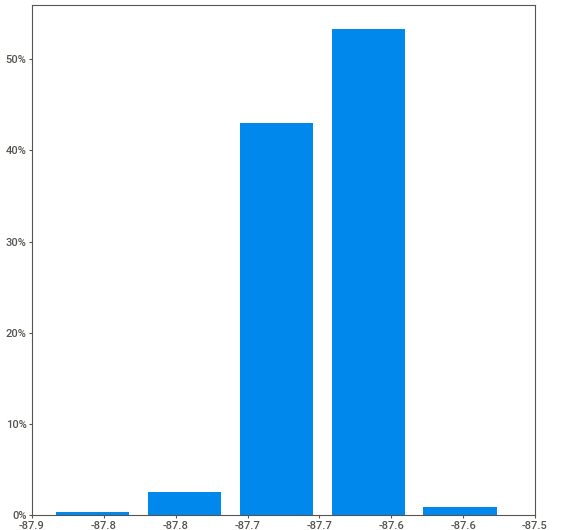
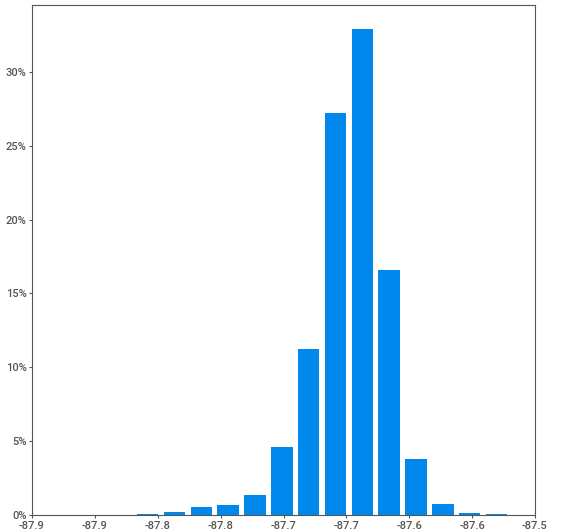
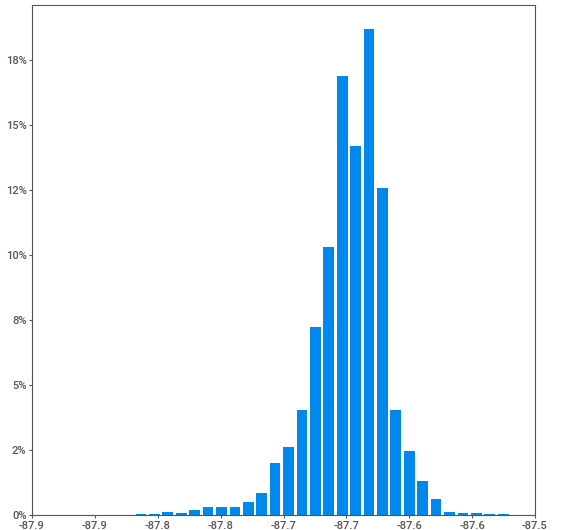
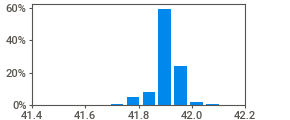
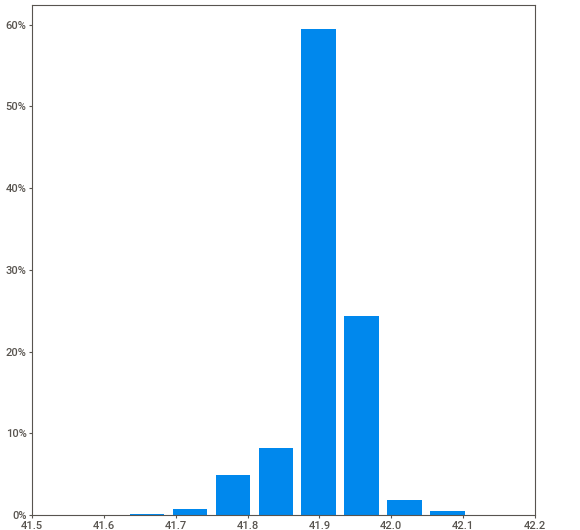
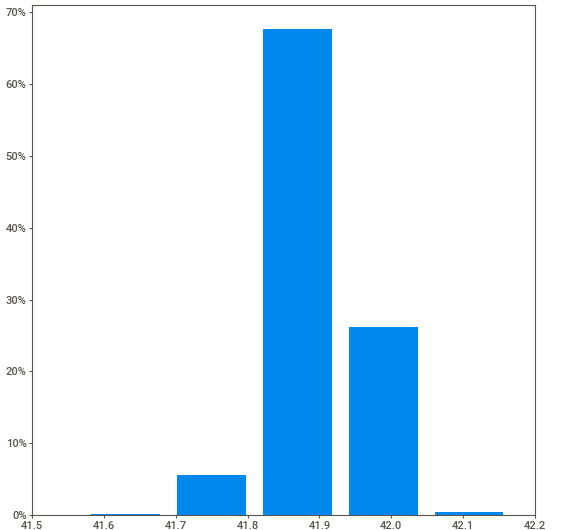
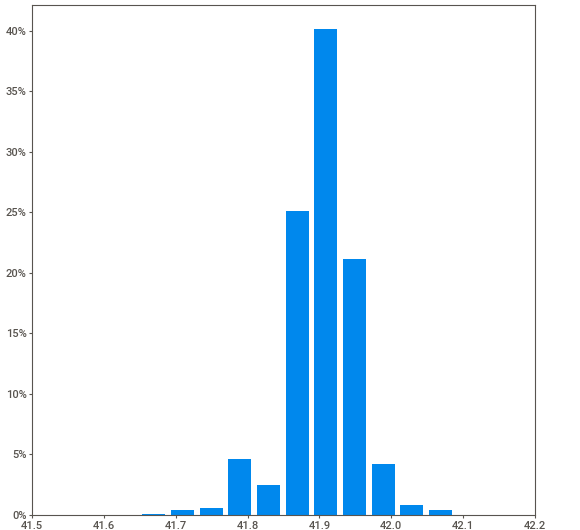
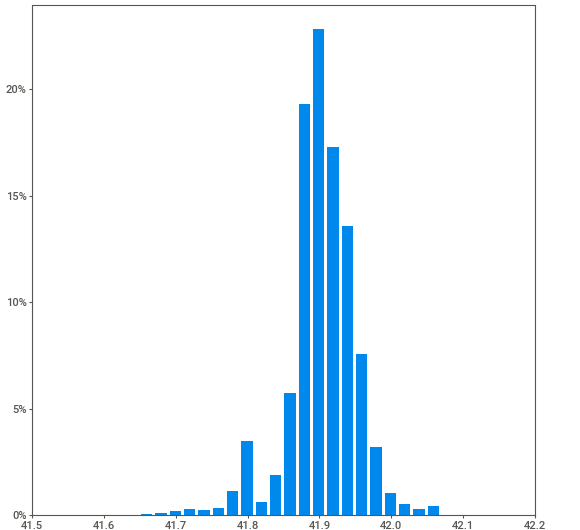
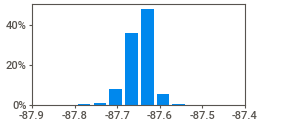
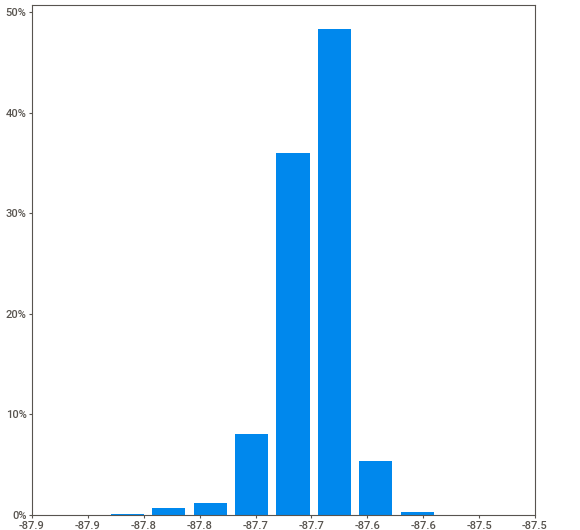
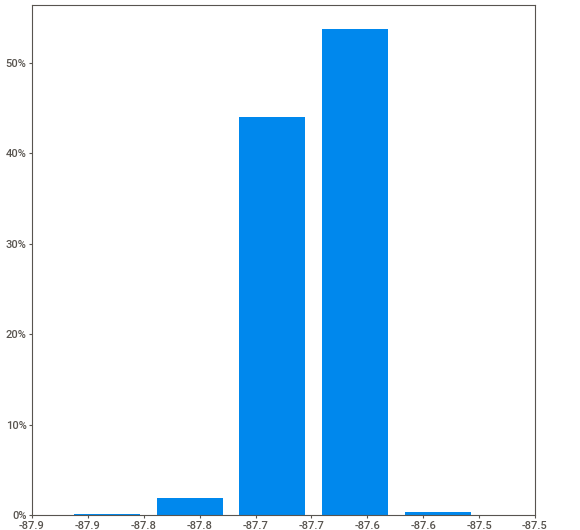
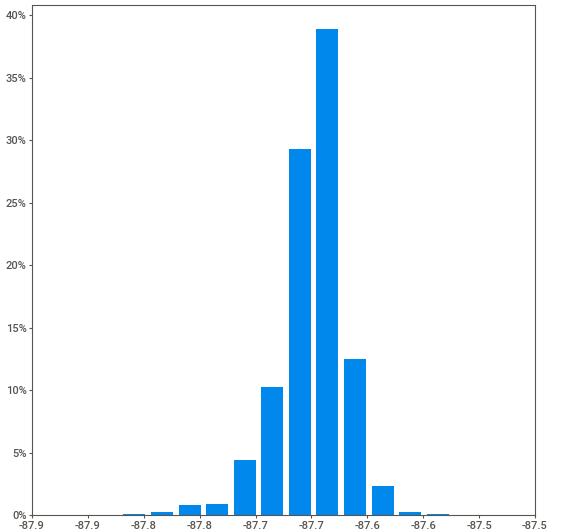
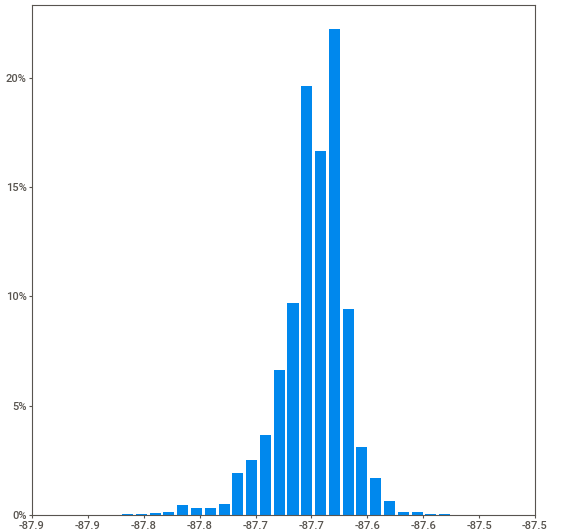
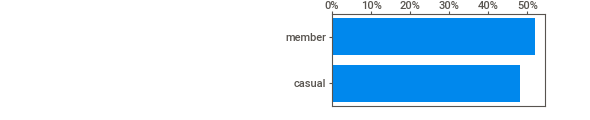
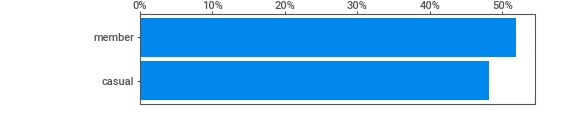
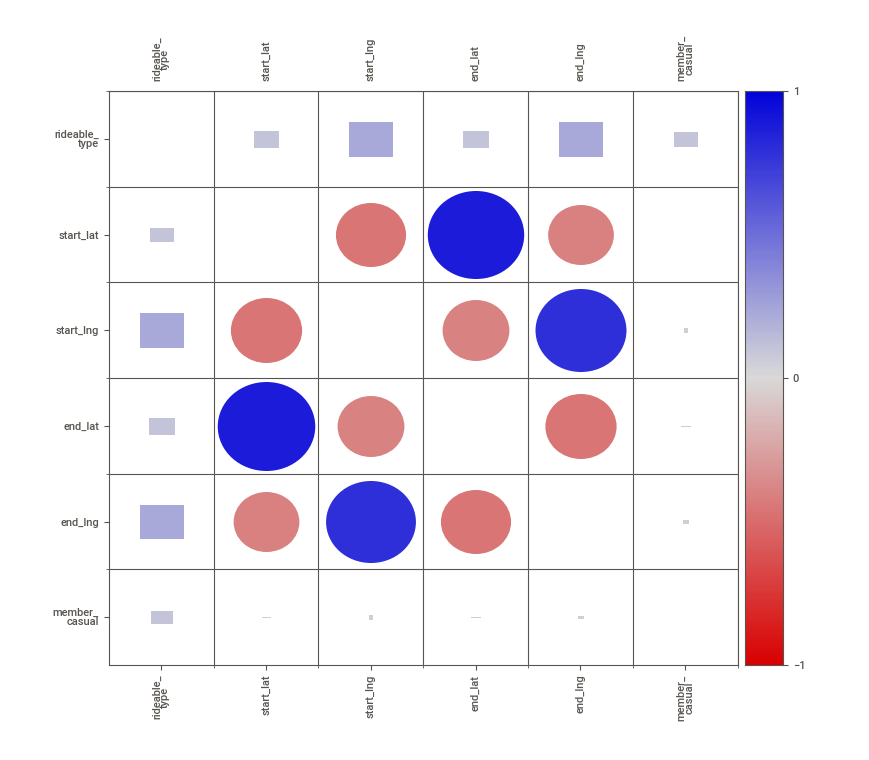
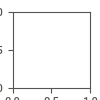

In [13]:
report.show_notebook()

In [14]:
data['ride_length_minutes'] = data['ride_length'].dt.total_seconds().div(60).astype(int)

In [15]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_minutes
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,41.89,-87.68,41.89,-87.67,casual,0 days 00:02:44,2
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,41.94,-87.64,41.98,-87.67,casual,0 days 00:15:14,15
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,41.81,-87.72,41.80,-87.72,casual,0 days 00:03:41,3
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,41.80,-87.72,41.81,-87.72,casual,0 days 00:08:49,8
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,41.88,-87.74,41.88,-87.71,casual,0 days 00:10:32,10


In [16]:
data['day_of_week'] = data['started_at'].dt.day_name()

In [17]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_minutes,day_of_week
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,41.89,-87.68,41.89,-87.67,casual,0 days 00:02:44,2,Tuesday
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,41.94,-87.64,41.98,-87.67,casual,0 days 00:15:14,15,Tuesday
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,41.81,-87.72,41.80,-87.72,casual,0 days 00:03:41,3,Tuesday
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,41.80,-87.72,41.81,-87.72,casual,0 days 00:08:49,8,Tuesday
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,41.88,-87.74,41.88,-87.71,casual,0 days 00:10:32,10,Tuesday


<AxesSubplot:xlabel='member_casual', ylabel='ride_length_minutes'>

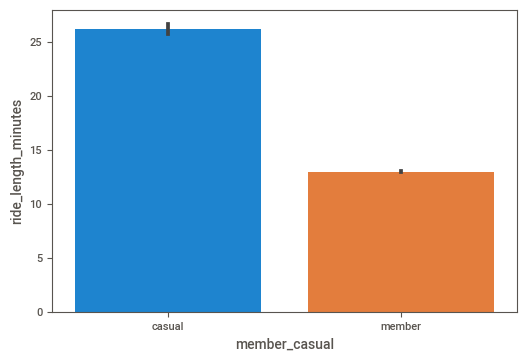

In [18]:
sns.barplot(x = "member_casual", y = "ride_length_minutes", data=data)

<AxesSubplot:xlabel='rideable_type', ylabel='ride_length_minutes'>

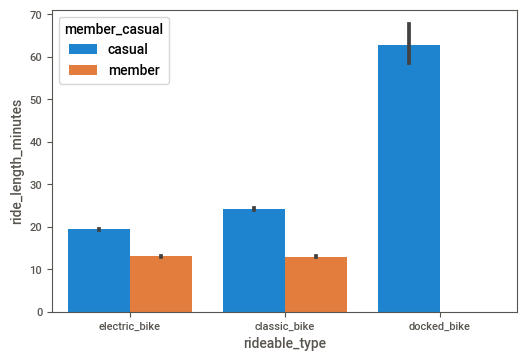

In [19]:
sns.barplot(x = "rideable_type", y = "ride_length_minutes", data=data, hue=data["member_casual"])

In [20]:
data_test = data[["member_casual", "rideable_type", "ride_length_minutes"]]
data_grp = data_test.groupby(["member_casual", "rideable_type"], as_index=False).mean()
data_grp


,member_casual,rideable_type,ride_length_minutes
0,casual,classic_bike,24.194552
1,casual,docked_bike,62.722897
2,casual,electric_bike,19.381029
3,member,classic_bike,12.971010
4,member,electric_bike,13.039246


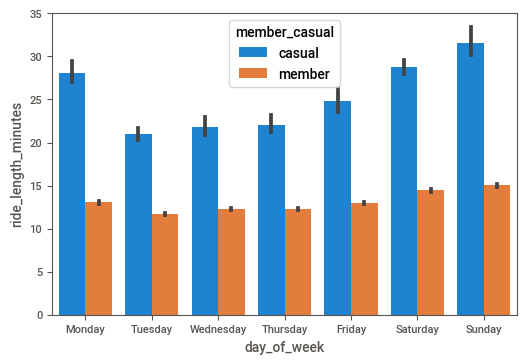

In [21]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.barplot(x=data["day_of_week"], y=data["ride_length_minutes"], hue=data["member_casual"], data=data, order=order)

<AxesSubplot:xlabel='day_of_week', ylabel='ride_length_minutes'>

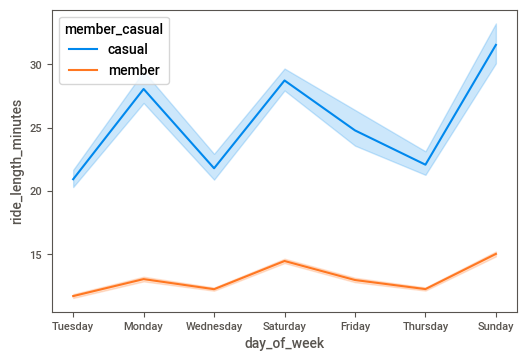

In [22]:
#lineplot 
sns.lineplot(x=data["day_of_week"], y=data["ride_length_minutes"], hue=data["member_casual"], data=data)

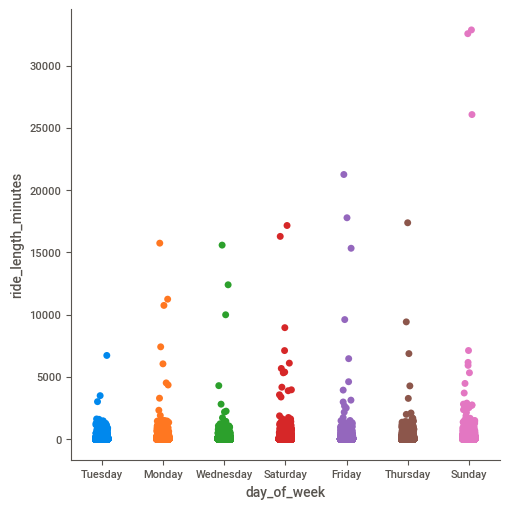

In [23]:

#categorical plot
sns.catplot(x=data["day_of_week"], y=data["ride_length_minutes"], data=data)

In [24]:
# import plotly.offline as py
# init_notebook_mode(connected = True)
# fig = px.scatter_geo(data,lat=data['start_lat'],lon=data['start_lng'], )
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()